In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regresion Lineal

- Es un tipo de aprendizaje supervisado que cae en la categoria de regresion.
- El resultado de una regresion es una variable continua.



## Funcion / Hipotesis

\begin{align}
h_ϴ(xi) = \theta_0 + \theta_1*x_1 + ... + \theta_n*x_n
\end{align}

En este caso para implementar tenemos una variable dependiente llamada $y$ la cual intentamos describir con nuestras variable independientes $x=(x_0, x_1, ..., x_n)$ donde $n$ es el numero de predictores.

Los $θ_0, θ_1,..., θ_n$ son los parametros de la hipotesis, es decir son los pesos que vamos a derivar para obtener una hipotesis que junto a nuevos predictores me lleven a encontrar una prediccion $y$ adecuada.

Con esta formula lo que buscamos es encontrar los $\theta$ mas apropiados a la funcion. para correctamente capturar describir la relacion entre mis variable $x$

In [ ]:
#Cargando los Datos
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/data_LinearRegression.csv')

In [ ]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


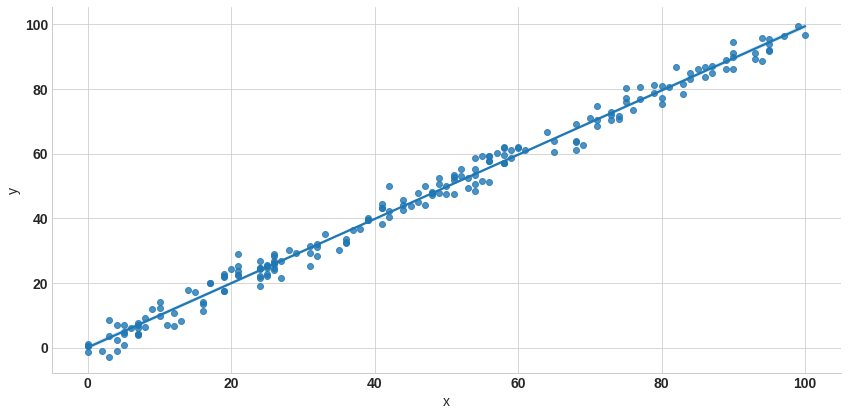

In [ ]:
sns.lmplot(x='x', y='y', data=df, aspect=2, height=6)

## Funcion de Perdida

Como Funcion de perdida implementamos la media de los errores cuadrados, la usamos ya que nuestro valor a predecir es una pendiente y una constante lo que usamos para disminiur la diferencia entre los valores reales y predictivos.

$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$



## Algoritmo de Optimizacion

- Gradiente descendente   

Con el fin de lograr encontrar el set de parametros optimos (pendiente y constante) usamos un algoritmo de optimizacion.

Vamos a implementar en clase el algoritmo mas famoso de Machine learning el cual es el de Gradiente descendente, este calcula de manera iterativa la funcion de perdida con respecto a nuestros parametros hasta que alcanzamos el minimo local.

Lo que buscamos aca es encontrar un minimo ya sea global o local que me entregue un modelo lo suficientemente util para lo que necesitamos.

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

Para orientarnos en lo que hace el algoritmo usamos la analogia de bajar la pendiente a ciegas.

1. Estamos en un monte donde debemos encontrar la salida en la parte de abajo, en este caso estamos a ciegas pero tenemos un aparato que nos ayuda a medir la altura a la que estamos.
2. Damos un paso en una direccion, y le preguntamos a nuestro aparato, aca lo que hacemos es calcular la **funcion de perdida**
3. Si disminuye, continuamos bajando si no cambiamos de direccion



\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

## Programemos


Vamos a realizar un ejemplo de un modelo de Regresion Lineal.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/insurance.csv')

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Estadistica descriptiva
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Verificar campos nulos en el dataset
df['age'].isnull().count()

1338

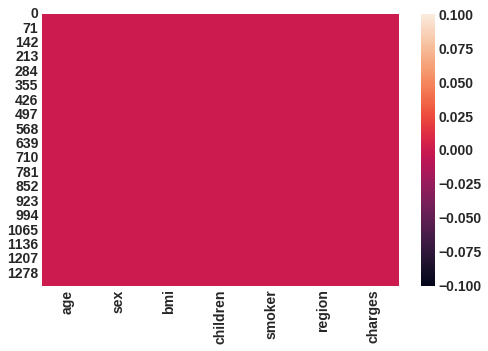

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull()

In [ ]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


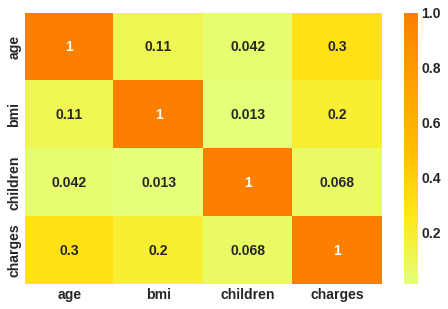

In [ ]:
#Correlación entre variables
sns.heatmap(corr, cmap='Wistia', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


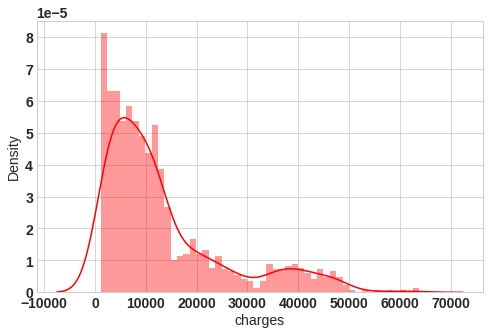

In [ ]:
#Distribución normal
sns.distplot(df['charges'], bins=50, color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


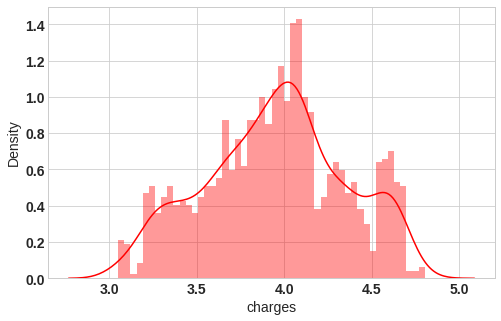

In [ ]:
#Distribución normal en logaritmo base 10
sns.distplot(np.log10(df['charges']), bins=50, color='r')

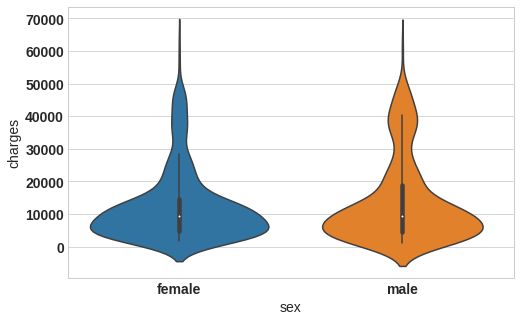

In [ ]:
sns.violinplot(x='sex', y = 'charges', data=df)

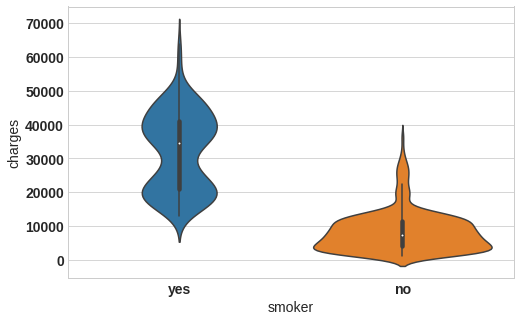

In [ ]:
sns.violinplot(x='smoker', y = 'charges', data=df)

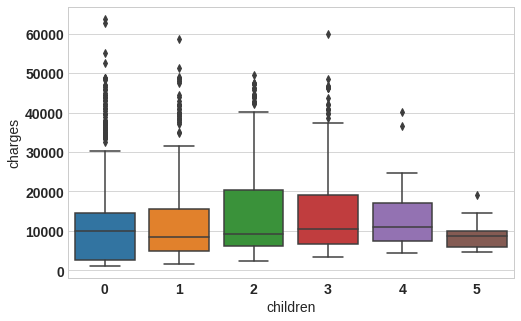

In [ ]:
sns.boxplot(x='children', y='charges', data= df)

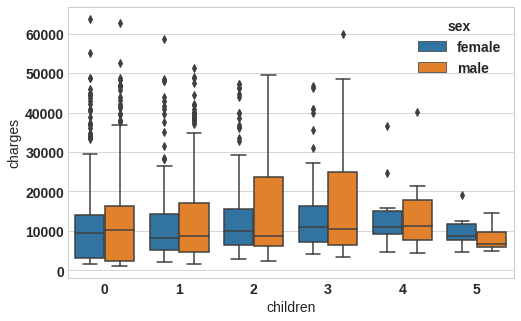

In [ ]:
sns.boxplot(x='children', y='charges', hue= 'sex', data= df)

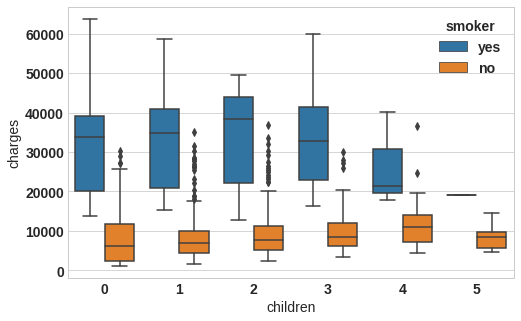

In [ ]:
sns.boxplot(x='children', y='charges', hue= 'smoker', data= df)

In [ ]:
df.groupby('children').agg(['mean', 'min', 'max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


In [ ]:
df.groupby('smoker').agg(['mean', 'min', 'max'])['charges']

,mean,min,max
smoker,,,
no,8434.268298,1121.8739,36910.60803
yes,32050.231832,12829.4551,63770.42801


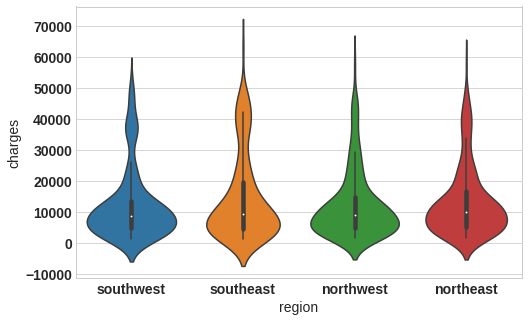

In [ ]:
sns.violinplot(x='region', y='charges', data=df)

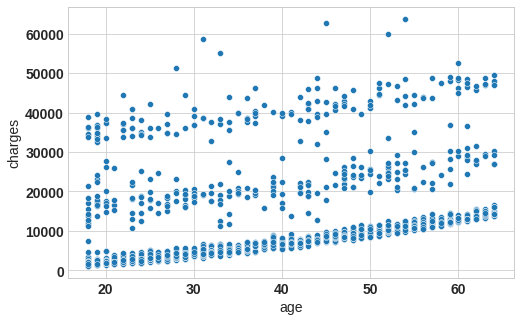

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)

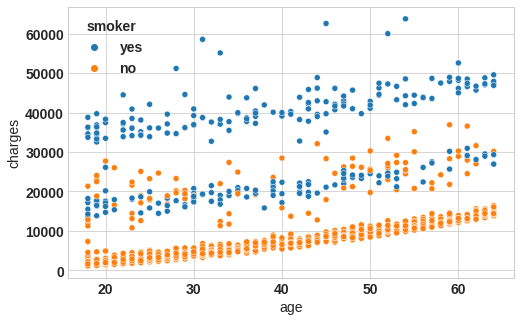

In [ ]:
sns.scatterplot(x='age', y='charges', hue='smoker',data=df)

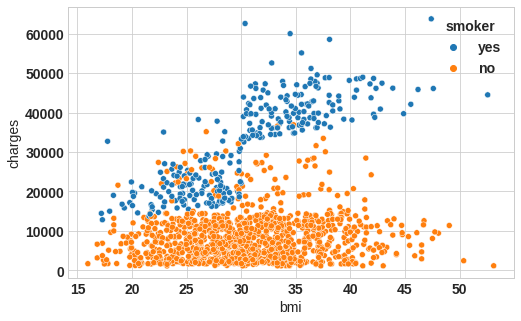

In [ ]:
sns.scatterplot(x='bmi', y='charges', hue='smoker',data=df)

In [ ]:
##Dummisar las variables categoricas
categorias = ['sex', 'smoker', 'children', 'region']
pd.get_dummies(data = df, columns=categorias)

,age,bmi,charges,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,0,0,0,0,0,1
1,18,33.770,1725.55230,1,0,1,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,0,1,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Eliminar la dependencia lineal entre las variables. Elimina una de las categorias. Al numero de categorias N-1
pd.get_dummies(data = df, columns=categorias, drop_first=True)

,age,bmi,charges,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,0,0,0,0,0,1
1,18,33.770,1725.55230,1,0,1,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,0,1,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Creamos un nuevo data set que realmente vamos a usar en el modelo con las variables "dummies"
#LOS MODELOS NO ENTIENDEN VARIABLES CATEGORICAS
df_dummy = pd.get_dummies(data = df, columns=categorias, drop_first=True, dtype='int8')

In [ ]:
#Usamos la libreria para machine learning de python. 
#Este paquete en especifica sirve para partir el dataset entre modelo de entrenamiento y de testeo
from sklearn.model_selection import train_test_split

In [ ]:
#Separamos el dataset entre las caracteristicas o atributos y la variable que vamos a predecir
#En este caso eliminamos la variable 'charges' del dataset que es la variable que vamos a predecir 
X = df_dummy.drop('charges', axis=1)

In [ ]:
X

,age,bmi,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,0,0,0,0,0,1
1,18,33.770,1,0,1,0,0,0,0,0,1,0
2,28,33.000,1,0,0,0,1,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,1,0,0,0,1,0,0,1,0,0
1334,18,31.920,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df_dummy['charges']

In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
##Esta función nos devuelve 4 datasets y los asignamos a las siguientes variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
#variables del dataset para entrenamiento. 80% de los datos
X_train

,age,bmi,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
708,31,30.495,0,0,0,0,1,0,0,0,0,0
45,55,37.300,1,0,0,0,0,0,0,0,0,1
434,31,28.595,1,0,1,0,0,0,0,1,0,0
995,39,23.275,0,0,0,0,1,0,0,0,0,0
1299,19,25.745,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31,18,26.315,0,0,0,0,0,0,0,0,0,0
950,57,18.335,1,0,0,0,0,0,0,0,0,0
1064,29,25.600,0,0,0,0,0,1,0,0,0,1
742,53,34.105,1,1,0,0,0,0,0,0,0,0


In [ ]:
#variables del dataset para testeo. 20% de los datos
X_test

,age,bmi,sex_male,smoker_yes,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
918,61,28.200,0,0,0,0,0,0,0,0,0,1
755,31,27.645,1,0,0,1,0,0,0,0,0,0
207,35,27.740,1,1,0,1,0,0,0,0,0,0
520,50,27.360,0,0,0,0,0,0,0,0,0,0
695,26,40.185,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,31,34.390,1,1,0,0,1,0,0,1,0,0
369,18,30.400,1,0,0,0,1,0,0,0,0,0
153,42,23.370,0,1,0,0,0,0,0,0,0,0
264,53,38.060,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Importamos la libreria para aplicar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
type(lin_reg)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Fit linear model. Ajustar el modelo de regresión lineal o entrenar el modelo
#Este es un modelo supervisado. Necesitamos pasarle al metodo fit los datos y la salida que debe devolver
#De esta forma calculamos los pesos del modelo o de la ecuación de la recta que se ajusta a los datos
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Intercepto de la linea recta
lin_reg.intercept_
#Coeficientes del modelo
lin_reg.coef_

array([  244.25072657,   335.34249557,   -58.8872739 , 23961.91178645,
         189.43427695,  1625.97266162,  1246.45039196,  3061.11367197,
        1131.30479197,  -571.6859447 , -1240.51701603, -1498.775981  ])

In [ ]:
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
sk_theta

[-11158.237397931605,
 244.25072657262862,
 335.3424955726531,
 -58.88727390195892,
 23961.91178644608,
 189.4342769492907,
 1625.9726616199923,
 1246.4503919573863,
 3061.113671970685,
 1131.3047919715848,
 -571.6859447022109,
 -1240.5170160310538,
 -1498.7759810029786]

In [ ]:
parameter = ['Theta_'+str(i) for i in range(X_train.shape[1] + 1)]
columnas = ['Intercepto:X_0=1'] + list(X_train.columns.values)

In [ ]:
parameter_df = pd.DataFrame({'parametros': parameter, 'columnas': columnas, 'theta':sk_theta})
parameter_df

,parametros,columnas,theta
0,Theta_0,Intercepto:X_0=1,-11158.237398
1,Theta_1,age,244.250727
2,Theta_2,bmi,335.342496
3,Theta_3,sex_male,-58.887274
4,Theta_4,smoker_yes,23961.911786
5,Theta_5,children_1,189.434277
6,Theta_6,children_2,1625.972662
7,Theta_7,children_3,1246.450392
8,Theta_8,children_4,3061.113672
9,Theta_9,children_5,1131.304792


In [ ]:
y_predecido = lin_reg.predict(X_test)
y_predecido

array([11698.93931714,  7251.16380364, 32221.93603346, 10229.26960957,
        8096.33373284, 10109.56877413, 35211.79247409,  8662.29556152,
       12554.18282305, 39848.59685692,  1514.72803916, 36879.71793793,
        4409.69045207, 12450.55266536,  7956.83034046,  5110.09068417,
        5152.76982035,  3841.0825849 , 35120.09916227, 33638.06679825,
       38460.95553546, 13147.75602461,  8930.8110753 ,  9960.15965071,
       35272.64576471,  6703.0930865 ,  5179.253227  , 29206.44689868,
         265.59365964, 11084.53488754, 13768.55181002,  4861.55444829,
        3819.95987576, 11811.79411531,  9507.19925294, 29072.60241535,
       10957.16838781, 11320.15518315, 10555.66077392,  5256.44060665,
       11158.02363891, 34618.84046073, 11046.90157546, 32468.02296343,
       11023.55333002, 13235.23652834,  4956.16814932,  6295.40886437,
        8588.48813009,  6231.75144399, 13215.72292758,  9539.08561691,
       10301.91477218,  5573.98456965,  6218.10617716, 14015.53119601,
      

In [ ]:
#Para verificar el error
from sklearn.metrics import mean_squared_error
J_mse = mean_squared_error(y_predecido, y_test)
J_mse

34620489.13506253

In [ ]:
lin_reg.score(X_test, y_test)

0.7538684380827081

In [ ]:
for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  print(lin_reg.score(X_test,y_test))

0.7476134962103442
0.7326378621972127
0.7406279545422649
0.7070684171301191
0.7250855327292791
0.7850520368000988
0.7723060439432018
0.7129804333968621
0.763147124712567
0.7218968210036487
